#CMPT353 summer 2020
#SFU
#Course Porject
#Author: Wei Yao (yaoweiy@sfu.ca) Yiran Zhang(yiran_zhang_2@sfu.ca)
#Dataset 1: Covid-19
#Resource Ref: https://www.kaggle.com/kimjihoo/coronavirusdataset

#Dataset 2: COVID19 Global Forecasting
#https://www.kaggle.com/c/covid19-global-forecasting-week-5

In [1]:

import numpy as np
import pandas as pd


In [2]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import chi2


# 2) Insights from Policy

# 2.1 Distribution of policy types

In [12]:
policy_df = pd.read_csv('Policy.csv')
df_type=policy_df['type'].tolist()
len(df_type)

61

In [13]:
policy_df['type'].value_counts(dropna=True)

Immigration       15
Education         15
Health            10
Technology         6
Social             5
Alert              4
Transformation     3
Administrative     3
Name: type, dtype: int64

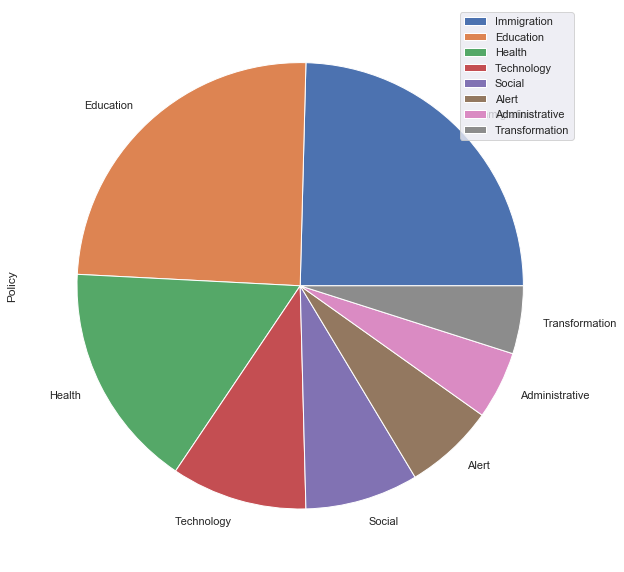

In [14]:
type_df = pd.DataFrame({'Policy': [15/61, 15/61 , 10/61,6/61,5/61,4/61,3/61,3/61]  } ,                 
                  index=['Immigration', 'Education', 'Health','Technology','Social','Alert','Administrative','Transformation'])
plot=type_df.plot.pie(y='Policy',figsize=(10,18))

# 2.2 Detailed Policy application Date

In [15]:
# pre-process
policy_df.head()


,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [16]:
df_gov_policy=policy_df['gov_policy'].tolist()
policy_df['gov_policy'].value_counts(dropna=True)
# sort data by date

policy_sort = policy_df.sort_values('start_date')

In [17]:
#replace long terms by short-cut
policy_sort['gov_policy']=policy_sort['gov_policy'].map({'Special Immigration Procedure': 'SIP',
                             'School Opening with Online Class':'SOOC',
                             'Emergency Use Authorization of Diagnostic Kit':'WUA',
                             'School Opening Delay':'SOD',
                             'Social Distancing Campaign':'SDC',
                             'Infectious Disease Alert Level':'IDAL',
                             'Mask Distribution':'MD',
                             'Wearing of masks':'WM',
                             'Drive-Through Screening Center':'D-T',
                             'Electronic Wristbands':'EW',
                             'Self-Quarantine Safety Protection App':'S-Q',
                             'Self-Diagnosis App':'S-D',
                             'Open Data ':'OD',
                             'Extends Tightened Quarantine Measures ':'ET',
                             'Close bars and clubs':'CB',
                             'School Closure':'SC',
                             'Mandatory 14-day Self-Quarantine':'M14',
                             'Open API':'OA',
                             'Close karaoke':'CK',
                             'Logistics center':'LC',
                             'local government Administrative orders':'LG',
                             'KI-Pass: Korea Internet - Pass':'KI',
                             'Thanks to Challenge korea':'TC',
                             'Mandatory Self-Quarantine & Diagonostic Tests':'MS'
                             
      
              })

In [18]:
pd.set_option('display.max_rows', None)
policy_sort['gov_policy']
#plt.plot(policy_df['gov_policy'],policy_df['start_date'])

0     IDAL
48      OD
1     IDAL
2     IDAL
4      SIP
19     WUA
5      SIP
6      SIP
50     S-D
20     WUA
3     IDAL
24     D-T
21     WUA
22     WUA
26      MD
28     SDC
37     SOD
36     SOD
35     SOD
34     SOD
33      SC
25     D-T
51     S-Q
49      OA
7      SIP
27      MD
9      SIP
8      SIP
23     WUA
12     SIP
10     SIP
11     SIP
13     SIP
14     SIP
15     SIP
16     SIP
29     SDC
17     M14
41    SOOC
38    SOOC
18      MS
32      TC
39    SOOC
40    SOOC
42    SOOC
43    SOOC
44    SOOC
45    SOOC
30     SDC
46    SOOC
47    SOOC
52      EW
31     SDC
53      CB
54      LG
55      CK
58      WM
57      WM
60      ET
56      LC
59      KI
Name: gov_policy, dtype: object

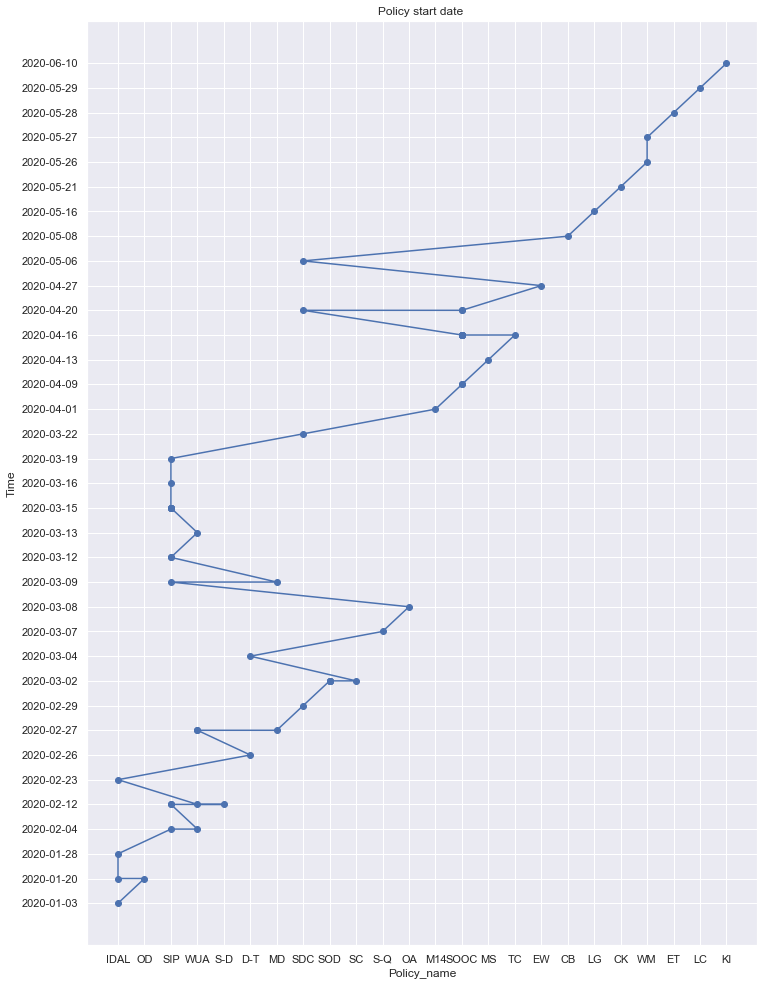

In [19]:
plt.figure(figsize=(12, 17))
plt.title('Policy start date ')
plt.xlabel('Policy_name')
plt.ylabel('Time')
plt.scatter(policy_sort['gov_policy'],policy_sort['start_date'])
plt.plot(policy_sort['gov_policy'],policy_sort['start_date'])